In [55]:
import csv
import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

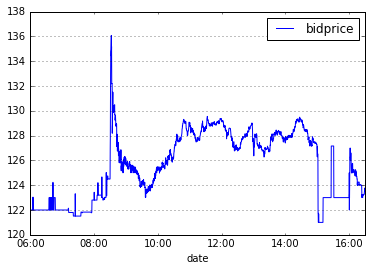

In [69]:
training_data = set()
path = '/Users/chrisdorman/PycharmProjects/Thinkful/git/Data_Science/ALXN_20161109.csv'
data = pd.read_csv(path, sep="\t")
dt = datetime.datetime(2016, 11, 9)
tm = datetime.time(0, 0)
data['date'] = map(lambda x: str(datetime.datetime.combine(date=dt, time=tm) + datetime.timedelta(seconds=x)), data['nsec'])
data['bidprice'] = data['bidprice'] / 10000.
df = pd.DataFrame(data, columns=['date', 'bidprice'])
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']
df.plot()





# keywords = ['trading halted', 'reports results', 'social velocity alert', 'SENTIMENT']
# seen = set()
# with open('/Users/chrisdorman/PycharmProjects/Thinkful/git/Data_Science/bloomberg_analytics_20161109.csv') as fn:
#     reader = csv.DictReader(fn)
#     count = 0
#     for row in reader:
#         symbol = row['SYMBOL']
#         if symbol == 'ALXN':
#             count += 1
#             ess = float(row['ESS'])
#             ts = row['TIMESTAMP']
#             for keyword in keywords:
#                 if ess > 70:
#                     training_data.add((str(row), 'pos'))
#                 else:
#                     training_data.add((str(row), 'neg'))
                
# for tup in training_data:
#     if 'pos' in tup:
#         print tup

# vocabulary = set(chain(*[word_tokenize(t[0].lower()) for t in training_data]))

# feature_set = [({i:(i in word_tokenize(keywords.lower())) for i in vocabulary},tag) for keywords, tag in training_data]

# classifier = nbc.train(feature_set)

# test_phrase = 'trading halted'

# featurized_test_phrase = {i:(i in word_tokenize(test_phrase.lower())) for i in vocabulary}
                
# print "test_sent:",test_phrase
# print "tag:",classifier.classify(featurized_test_phrase)


                
